In [176]:
import pandas as pd
# import cugrid
# import cuml
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.decomposition import IncrementalPCA
from random import sample
from numpy.random import uniform
from sklearn.neighbors import NearestNeighbors
from math import isnan
from sklearn.preprocessing import scale
from clustergram import Clustergram


In [177]:
local_crs = 27700
place = "test"
lat = 55.86421405612109
lng = -4.251846930489373
country = "UK"
crs=4326
radius=1

In [178]:
grid = pd.read_parquet(f"output/{place}/p4-grid-output.pq")

In [179]:
grid.set_index(['row', 'col'], inplace=True)


In [180]:
grid = grid.drop(columns=["geometry"])

In [181]:
grid.columns.tolist()

['tess_area_median',
 'tess_area_std',
 'tess_area_q25',
 'tess_area_q75',
 'tessellation_neighbours_median',
 'tessellation_neighbours_std',
 'tessellation_neighbours_q25',
 'tessellation_neighbours_q75',
 'tess_convexity_median',
 'tess_convexity_std',
 'tess_convexity_q25',
 'tess_convexity_q75',
 'tess_covered_area_median',
 'tess_covered_area_std',
 'tess_covered_area_q25',
 'tess_covered_area_q75',
 'tess_orientation_median',
 'tess_orientation_std',
 'tess_orientation_q25',
 'tess_orientation_q75',
 'tess_convexity_weight_median',
 'tess_convexity_weight_std',
 'tess_convexity_weight_q25',
 'tess_convexity_weight_q75',
 'tess_covered_area_weight_median',
 'tess_covered_area_weight_std',
 'tess_covered_area_weight_q25',
 'tess_covered_area_weight_q75',
 'tess_orientation_weight_median',
 'tess_orientation_weight_std',
 'tess_orientation_weight_q25',
 'tess_orientation_weight_q75',
 'tess_rea_theil_median',
 'tess_rea_theil_std',
 'tess_rea_theil_q25',
 'tess_rea_theil_q75',
 'bui

In [182]:
colsubset = grid.head().columns.tolist().remove("building_height")

In [183]:
grid.describe()

tess_area_median  tess_area_std  tess_area_q25  tess_area_q75  \
count        381.000000     343.000000     381.000000     381.000000   
mean        8746.468870    5200.892881    6952.478702   11444.051609   
std         7550.532491    4903.918283    6115.057036    8962.542128   
min         1454.381551       0.000000     405.113262    1523.611149   
25%         4270.804626    1657.186217    3522.886252    5468.128388   
50%         6641.105177    3498.576134    4861.633755    8286.396325   
75%        10709.316789    8122.937128    8467.772484   15074.728672   
max        48487.119144   26943.878769   48487.119144   48487.119144   

       tessellation_neighbours_median  tessellation_neighbours_std  \
count                      381.000000                   343.000000   
mean                         0.144660                     0.045498   
std                          0.052594                     0.045314   
min                          0.001035                     0.000000   
25%                          0.107807                     0.018385   
50%                          0.144616                     0.030776   
75%                          0.178606                     0.058471   
max                          0.329490                     0.353721   

       tessellation_neighbours_q25  tessellation_neighbours_q75  \
count                   381.000000                   381.000000   
mean                      0.128296                     0.166022   
std                       0.044462                     0.064948   
min                       0.001035                     0.001035   
25%                       0.095669                     0.121085   
50%                       0.129685                     0.162663   
75%                       0.159988                     0.204483   
max                       0.269396                     0.394073   

       tess_convexity_median  tess_convexity_std  ...  \
count             381.000000          343.000000  ...   
mean                0.925840            0.063407  ...   
std                 0.064200            0.046387  ...   
min                 0.494710            0.000000  ...   
25%                 0.905061            0.028681  ...   
50%                 0.940921            0.054005  ...   
75%                 0.967270            0.084203  ...   
max                 1.000000            0.277199  ...   

       building_neighbourhood_interbuilding_distance_weight_median  \
count                                         381.000000             
mean                                           24.249399             
std                                            11.625814             
min                                            12.335328             
25%                                            16.027671             
50%                                            21.238747             
75%                                            26.544980             
max                                            67.272383             

       building_neighbourhood_interbuilding_distance_weight_std  \
count                                         343.000000          
mean                                            0.943482          
std                                             1.039209          
min                                             0.000000          
25%                                             0.309768          
50%                                             0.635486          
75%                                             1.150295          
max                                             6.685857          

       building_neighbourhood_interbuilding_distance_weight_q25  \
count                                         381.000000          
mean                                           23.853543          
std                                            11.519337          
min                                            11.931917          
25%                                    

In [184]:
grid_dropped = grid.dropna(subset=["entry_count"], how='all')
grid_dropped = grid_dropped[grid_dropped['building_height'] != 255]
grid_dropped = grid_dropped[grid_dropped['entry_count'] > 2]

In [185]:
grid_dropped

tess_area_median  tess_area_std  tess_area_q25  tess_area_q75  \
row col                                                                  
12  27        2323.379370    5680.324447    1633.849231    9791.009066   
15  27        3539.157414    4896.586716    1118.950901    5684.893767   
14  28        6158.476863    2765.776484    2148.275946    6728.592707   
    20        6308.048325    2534.086244    3489.934186    7608.074029   
    19        3554.637627    6218.768210    3115.555833    6743.227117   
...                   ...            ...            ...            ...   
8   4         6018.846121    2600.322227    3769.803339    8187.070202   
12  25       12271.665540    2109.776698   10715.332010   12727.086123   
13  15        3792.162538    1841.792419    3070.585552    4887.094338   
3   18        1670.530995    6029.308077     935.842015    6485.810454   
4   7         6180.033898    4990.727733    3525.340025    8512.601278   

         tessellation_neighbours_median  tessellation_neighbours_std  \
row col                                                                
12  27                         0.220762                     0.064923   
15  27                         0.129902                     0.065977   
14  28                         0.118665                     0.022492   
    20                         0.152403                     0.031479   
    19                         0.176907                     0.047110   
...                                 ...                          ...   
8   4                          0.181329                     0.014838   
12  25                         0.135059                     0.051289   
13  15                         0.180837                     0.079314   
3   18                         0.109113                     0.121831   
4   7                          0.083879                     0.069960   

         tessellation_neighbours_q25  tessellation_neighbours_q75  \
row col                                                             
12  27                      0.149362                     0.252490   
15  27                      0.093582                     0.194877   
14  28                      0.107327                     0.134761   
    20                      0.135398                     0.162578   
    19                      0.141521                     0.213694   
...                              ...                          ...   
8   4                       0.169164                     0.194146   
12  25                      0.130249                     0.176876   
13  15                      0.154797                     0.229578   
3   18                      0.083369                     0.199368   
4   7                       0.066606                     0.133954   

         tess_convexity_median  tess_convexity_std  ...  \
row col                                             ...   
12  27                0.925861            0.037637  ...   
15  27                0.897903            0.061525  ...   
14  28                0.974963            0.021580  ...   
    20                0.999961            0.005950  ...   
    19                0.984226            0.087373  ...   
...                        ...                 ...  ...   
8   4                 0.986885            0.043909  ...   
12  25                0.972147            0.049678  ...   
13  15                0.971425            0.138169  ...   
3   18                0.945115            0.061948  ...   
4   7                 0.874980            0.068485  ...   

         building_neighbourhood_interbuilding_distance_weight_median  \
row col                                                                
12  27                                           27.120427             
15  27                                           26.078793             
14  28                                           29.113886             
    20                                           20.880658             
    19     

In [186]:
grid_dropped.isnull().sum(axis=1).value_counts(ascending=False)

0    273
Name: count, dtype: int64

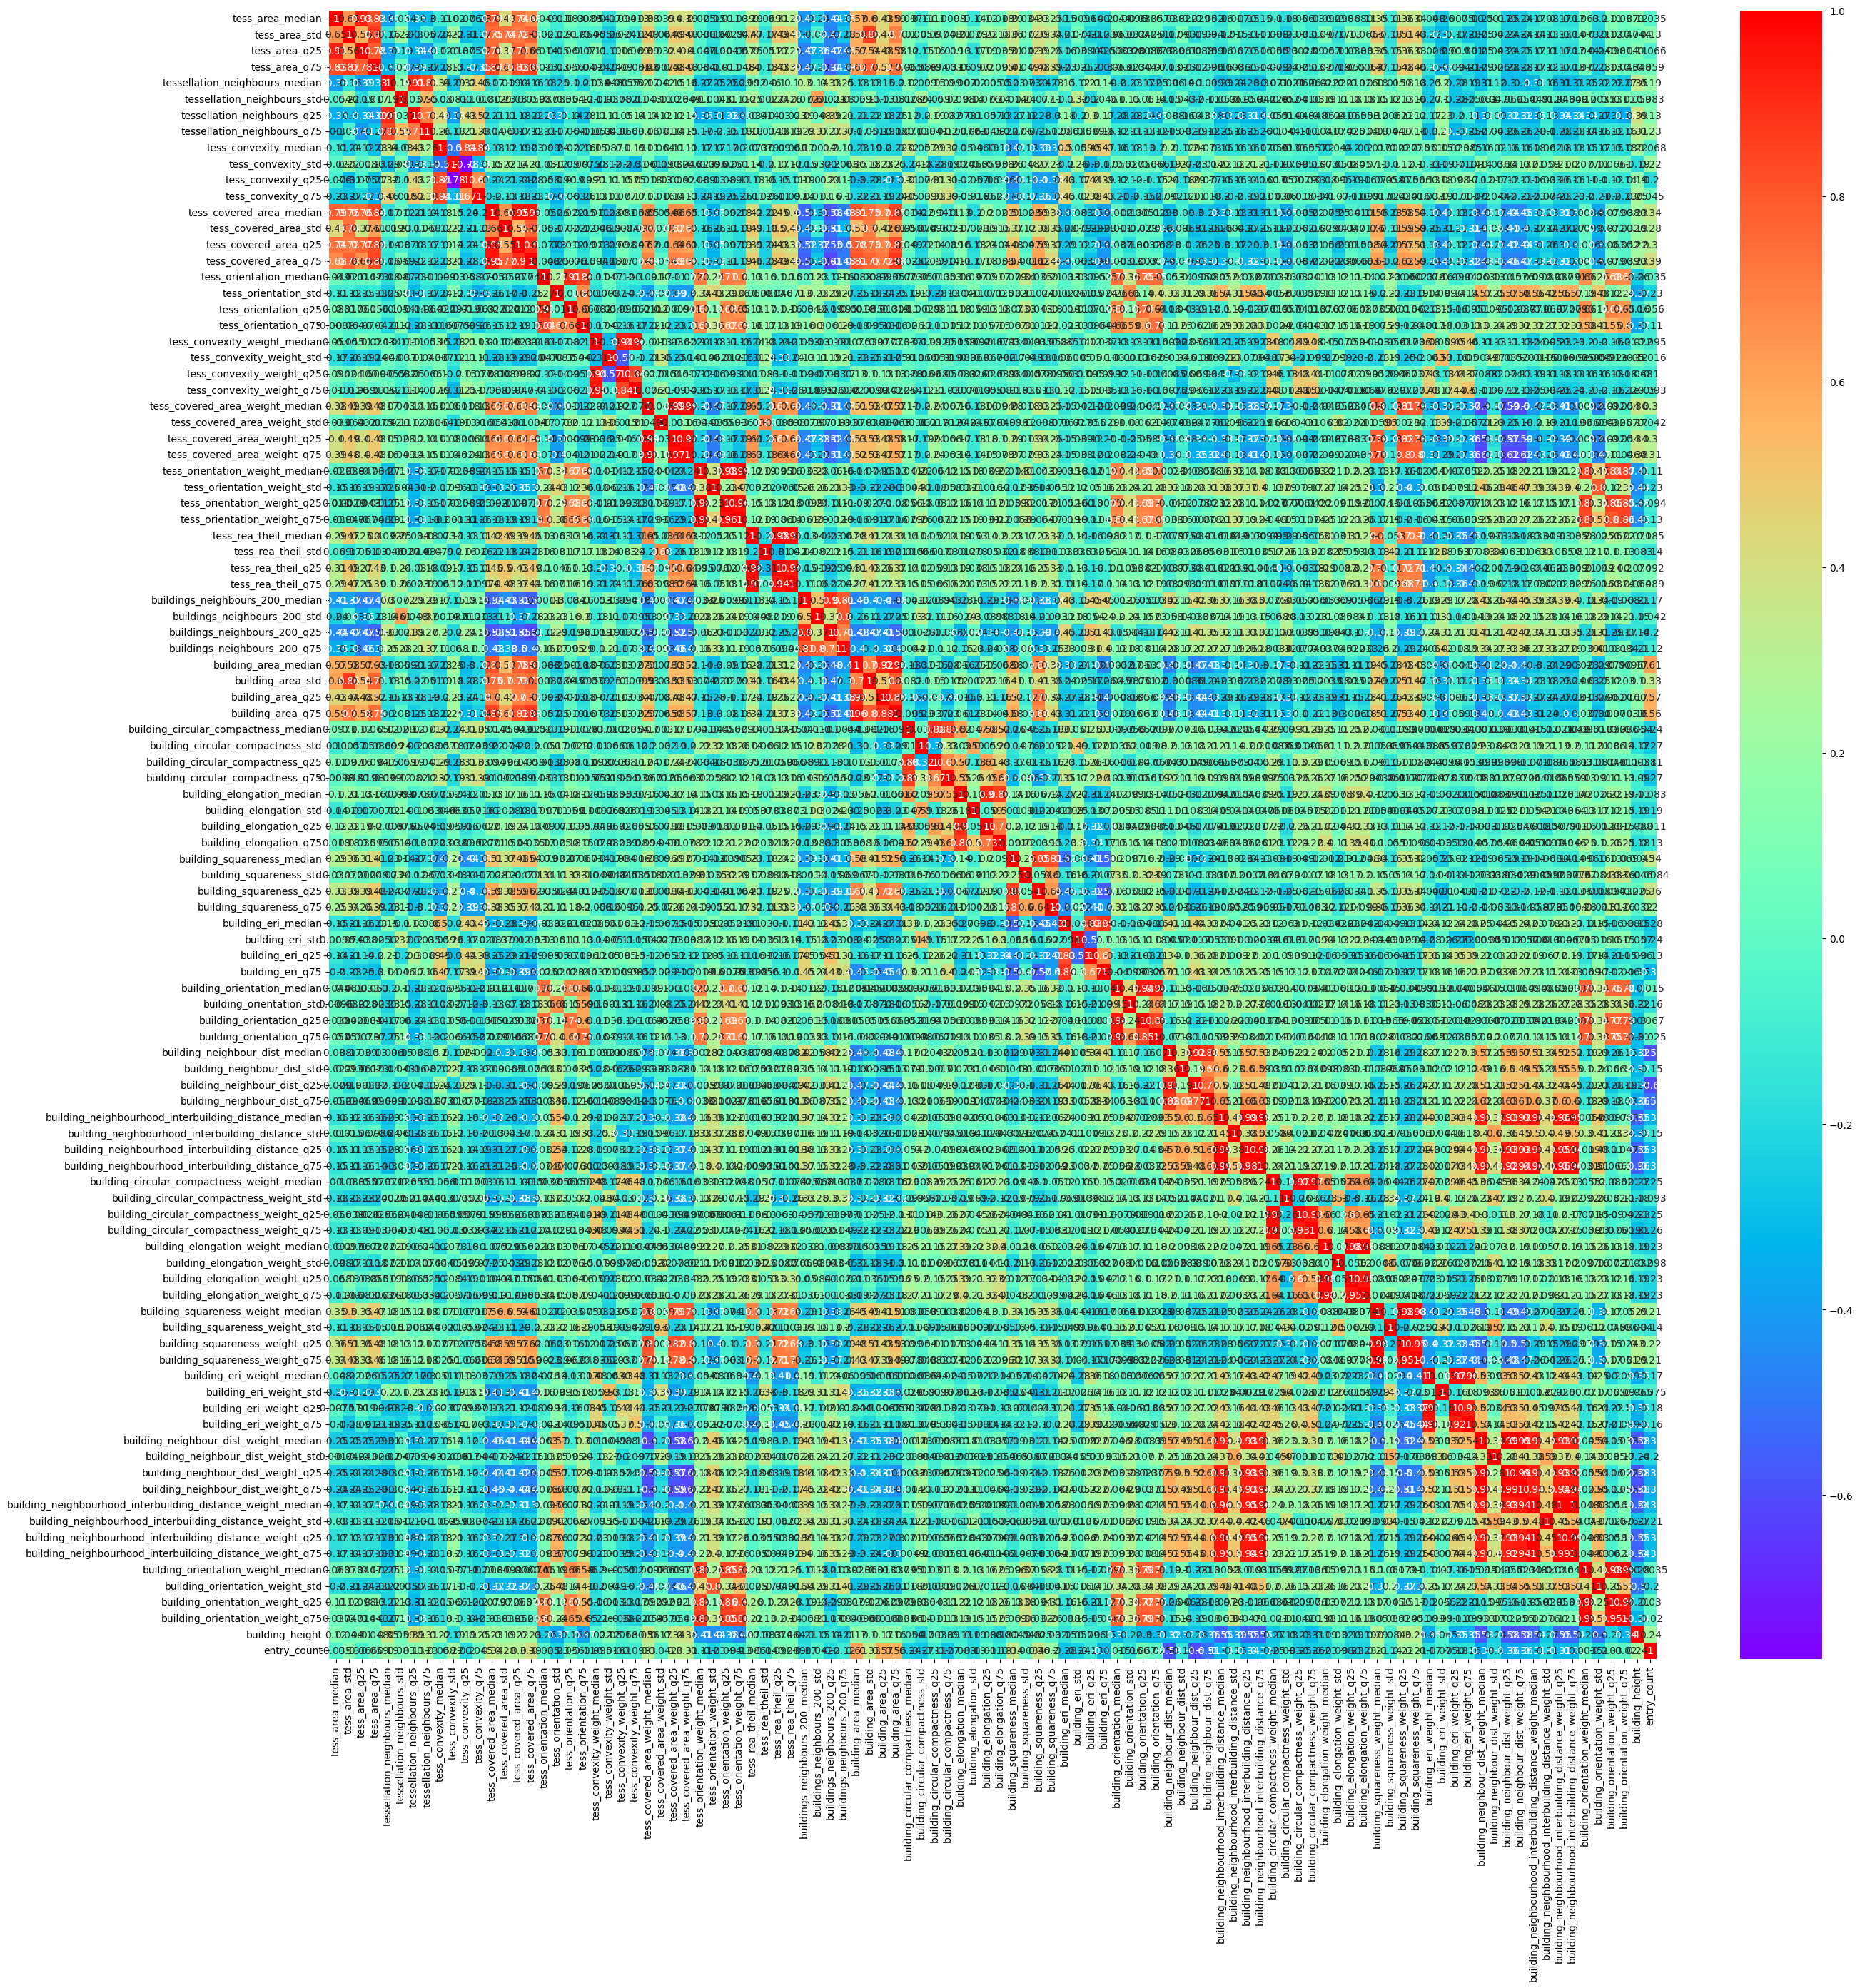

In [187]:
plt.figure(figsize = (30, 30))
sns.heatmap(grid_dropped.corr(), annot = True, cmap="rainbow")
plt.savefig('Correlation')
plt.show()

In [188]:
str(grid_dropped.index[0])

'(12, 27)'

In [189]:
scaler = StandardScaler()
tessellation_scaled = scaler.fit_transform(grid_dropped)

In [190]:
pca = PCA(svd_solver='randomized', random_state=50)


In [191]:
pca.fit(tessellation_scaled)

PCA(random_state=50, svd_solver='randomized')

In [192]:
pca.components_

array([[-0.10715123, -0.12293021, -0.10927665, ...,  0.02292563,
        -0.1077285 , -0.1007492 ],
       [ 0.07564984,  0.10413157,  0.06614829, ...,  0.20704185,
        -0.11454974, -0.00802355],
       [-0.11299105, -0.10911507, -0.12893745, ...,  0.14028275,
         0.07382457,  0.03147611],
       ...,
       [-0.0155395 ,  0.00299797,  0.01960528, ...,  0.03320102,
         0.00061263,  0.00510859],
       [-0.00894405,  0.00752878, -0.004014  , ..., -0.00841107,
         0.00349972,  0.00134174],
       [-0.00100777,  0.00311917, -0.00548389, ...,  0.03601432,
        -0.00034155, -0.000957  ]])

In [193]:
# Variance Ratio

pca.explained_variance_ratio_

array([2.16756821e-01, 1.33445008e-01, 8.93249335e-02, 7.26945346e-02,
       6.37999917e-02, 4.77746806e-02, 3.63168578e-02, 3.29313831e-02,
       2.91174401e-02, 2.39692586e-02, 2.18435716e-02, 1.96841187e-02,
       1.50833338e-02, 1.32538073e-02, 1.24085012e-02, 1.09499766e-02,
       1.02077041e-02, 1.01264479e-02, 9.85861723e-03, 8.98566606e-03,
       8.47818153e-03, 7.91343346e-03, 7.37337757e-03, 6.98178357e-03,
       6.54593713e-03, 6.18159927e-03, 5.72365496e-03, 5.27111172e-03,
       4.63830019e-03, 4.44200587e-03, 4.13549380e-03, 3.86589068e-03,
       3.37202724e-03, 3.22045908e-03, 2.94042656e-03, 2.88752320e-03,
       2.57154911e-03, 2.50515266e-03, 2.38515055e-03, 2.33020067e-03,
       2.06513297e-03, 1.81490151e-03, 1.74714001e-03, 1.62997878e-03,
       1.42228942e-03, 1.32242062e-03, 1.24989032e-03, 1.22706149e-03,
       1.10901363e-03, 1.02973338e-03, 9.62158861e-04, 8.49064251e-04,
       7.87656160e-04, 7.56797684e-04, 7.10068108e-04, 6.74697388e-04,
      

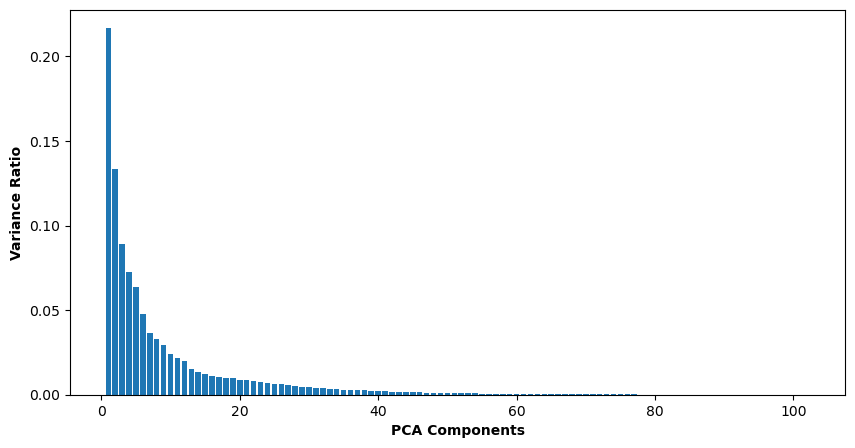

In [194]:
# Variance Ratio bar plot for each PCA components.
plt.figure(figsize = (10, 5))
ax = plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')

plt.show()

In [195]:
# calculate the cumulative sum of explained variance ratios
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)

org_col = list(grid_dropped.columns)

num_pc = np.argmax(cumulative_sum >= 0.95) + 1

pc_dict = {'Attribute': org_col}

pc_dict.update({f'PC_{i+1}':pca.components_[i] for i in range(num_pc)})

attributes_pca = pd.DataFrame(pc_dict)

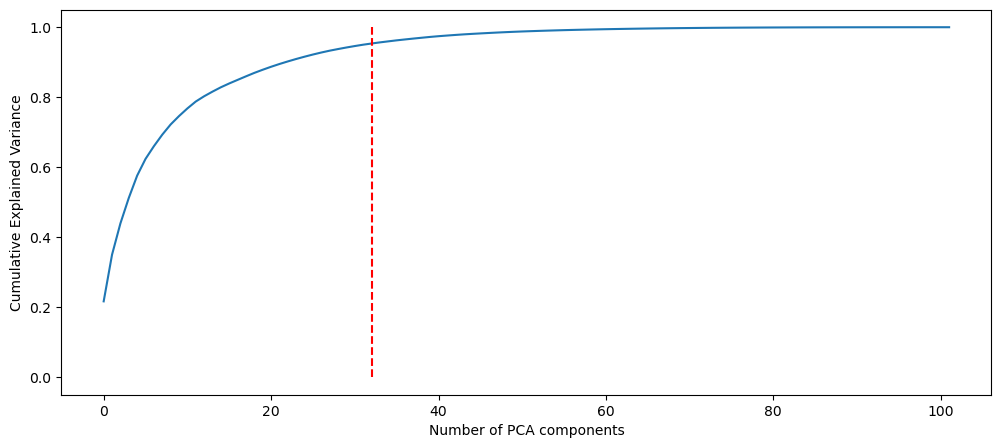

In [196]:
# Scree plot to visualize the Cumulative variance against the Number of components

fig = plt.figure(figsize = (12,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=num_pc, ymax=1, ymin=0, colors="r", linestyles="--")
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [197]:
attributes_pca

Attribute      PC_1      PC_2      PC_3      PC_4  \
0                   tess_area_median -0.107151  0.075650 -0.112991  0.002342   
1                      tess_area_std -0.122930  0.104132 -0.109115 -0.050463   
2                      tess_area_q25 -0.109277  0.066148 -0.128937 -0.003188   
3                      tess_area_q75 -0.129447  0.103201 -0.132631 -0.010729   
4     tessellation_neighbours_median -0.022398 -0.125894  0.131784 -0.123442   
..                               ...       ...       ...       ...       ...   
97   building_orientation_weight_std  0.128543  0.110013  0.005673  0.012877   
98   building_orientation_weight_q25 -0.016993  0.197932  0.159527  0.014357   
99   building_orientation_weight_q75  0.022926  0.207042  0.140283  0.019659   
100                  building_height -0.107729 -0.114550  0.073825 -0.002417   
101                      entry_count -0.100749 -0.008024  0.031476  0.116408   

         PC_5      PC_6      PC_7      PC_8      PC_9  ...     PC_23  \
0   -0.033193  0.146899 -0.023692  0.192187 -0.158954  ... -0.037474   
1    0.047223  0.042144  0.018832  0.060437 -0.056224  ...  0.074962   
2   -0.065455  0.132526 -0.047086  0.193484 -0.152960  ... -0.053839   
3   -0.009304  0.086111  0.008291  0.131776 -0.113063  ...  0.009380   
4    0.097034 -0.013483  0.105668 -0.153444  0.154242  ...  0.094017   
..        ...       ...       ...       ...       ...  ...       ...   
97  -0.000910  0.012632  0.008789 -0.056503  0.019210  ...  0.131607   
98  -0.082640  0.095511 -0.060952 -0.053804 -0.013289  ... -0.091082   
99  -0.071781  0.090143 -0.059283 -0.067785  0.000775  ... -0.034653   
100  0.057149 -0.031764  0.019904  0.063972 -0.005472  ...  0.013792   
101  0.019307 -0.014324  0.049886 -0.158335  0.258381  ... -0.019274   

        PC_24     PC_25     PC_26     PC_27     PC_28     PC_29     PC_30  \
0   -0.245702 -0.061932 -0.088100 -0.025914  0.117169  0.103174 -0.045744   
1    0.048116 -0.042057  0.091930 -0.020522 -0.206095 -0.047276  0.066341   
2   -0.276354 -0.057531 -0.059207 -0.031888  0.111461  0.077883 -0.078150   
3   -0.013965 -0.023498  0.039452  0.061677 -0.090036 -0.024656  0.018240   
4   -0.153420 -0.151221  0.222877  0.055618  0.006564  0.010673  0.061271   
..        ...       ...       ...       ...       ...       ...       ...   
97  -0.078159 -0.132251 -0.069336  0.049426 -0.017780  0.177168  0.157411   
98  -0.052812  0.033223 -0.018632 -0.033562  0.014902 -0.037760  0.075056   
99  -0.082613 -0.024875 -0.046739 -0.004497  0.002712 -0.001201  0.109421   
100 -0.277884  0.056698 -0.120661  0.119447  0.346755  0.117521  0.398231   
101  0.020009 -0.091693  0.035272 -0.247211  0.119582 -0.148574  0.031747   

        PC_31     PC_32  
0    0.153016 -0.104935  
1   -0.042505  0.244896  
2    0.177396 -0.089710  
3    0.056095  0.065004  
4   -0.002815 -0.029861  
..        ...       ...  
97   0.063867 -0.078043  
98   0.013486 -0.029935  
99   0.020413 -0.047690  
100 -0.229528  0.367571  
101 -0.235297 -0.220012  

[102 rows x 33 columns]

In [198]:
# Building the dataframe using Incremental PCA for better efficiency.

inc_pca = IncrementalPCA(n_components=num_pc)

In [199]:
# Fitting the scaled df on incremental pca

df_inc_pca = inc_pca.fit_transform(tessellation_scaled)
df_inc_pca

array([[ 1.47148915, -0.27918965,  0.50381578, ..., -0.68636195,
         0.16937684,  0.52347034],
       [ 5.19900913,  5.48665235, -2.20792251, ...,  0.34210955,
        -0.36592887, -0.91956842],
       [ 7.9167049 ,  3.89703683, -2.44884839, ...,  1.64432314,
         1.48458463, -1.05262001],
       ...,
       [-2.7120647 , -2.72405883, -1.67685979, ..., -0.59726356,
         0.03432524, -0.61145271],
       [10.88299171,  7.72455973,  1.64661834, ...,  0.43636064,
        -1.74808864, -0.10415006],
       [ 1.58799232,  4.81822511, -2.38900529, ..., -0.66144638,
         1.12395123,  0.4242835 ]])

In [200]:
# Creating new dataframe with Principal components


df_pca = pd.DataFrame(df_inc_pca, columns=[f"PC_{i+1}" for i in range(num_pc)])

In [201]:
df_pca_with_uID = df_pca.copy()

In [202]:
df_pca_with_uID["uID"] = [str(i) for i in grid_dropped.index]

In [203]:
# Calculating Hopkins score to know whether the data is good for clustering or not.

def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS


In [204]:
# Hopkins score
Hopkins_score=round(hopkins(df_pca),2)

In [205]:
print(Hopkins_score)

0.74


The Hopkins statistic (introduced by Brian Hopkins and John Gordon Skellam) is a way of measuring the cluster tendency of a data set.[1] It belongs to the family of sparse sampling tests. It acts as a statistical hypothesis test where the null hypothesis is that the data is generated by a Poisson point process and are thus uniformly randomly distributed.[2] A value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.[3]

In [206]:
len(df_pca_with_uID)

273

In [209]:
data = df_pca

In [210]:
cgram = Clustergram(range(1, 30), n_init=10, method='minibatchkmeans', batch_size=100, backend='sklearn')
cgram.fit(data)

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.057 seconds.
K=3 fitted in 0.074 seconds.


c:\ProgramData\anaconda3\envs\processor\Lib\site-packages\sklearn\cluster\_kmeans.py:1966: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
c:\ProgramData\anaconda3\envs\processor\Lib\site-packages\sklearn\cluster\_kmeans.py:1966: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
c:\ProgramData\anaconda3\envs\processor\Lib\site-packages\sklearn\cluster\_kmeans.py:1966: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variab

K=4 fitted in 0.109 seconds.
K=5 fitted in 0.085 seconds.
K=6 fitted in 0.081 seconds.


c:\ProgramData\anaconda3\envs\processor\Lib\site-packages\sklearn\cluster\_kmeans.py:1966: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
c:\ProgramData\anaconda3\envs\processor\Lib\site-packages\sklearn\cluster\_kmeans.py:1966: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
c:\ProgramData\anaconda3\envs\processor\Lib\site-packages\sklearn\cluster\_kmeans.py:1966: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variab

K=7 fitted in 0.096 seconds.
K=8 fitted in 0.071 seconds.
K=9 fitted in 0.084 seconds.


c:\ProgramData\anaconda3\envs\processor\Lib\site-packages\sklearn\cluster\_kmeans.py:1966: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
c:\ProgramData\anaconda3\envs\processor\Lib\site-packages\sklearn\cluster\_kmeans.py:1966: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
c:\ProgramData\anaconda3\envs\processor\Lib\site-packages\sklearn\cluster\_kmeans.py:1966: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variab

K=10 fitted in 0.110 seconds.
K=11 fitted in 0.158 seconds.


c:\ProgramData\anaconda3\envs\processor\Lib\site-packages\sklearn\cluster\_kmeans.py:1966: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
c:\ProgramData\anaconda3\envs\processor\Lib\site-packages\sklearn\cluster\_kmeans.py:1966: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


K=12 fitted in 0.085 seconds.
K=13 fitted in 0.082 seconds.
K=14 fitted in 0.103 seconds.


c:\ProgramData\anaconda3\envs\processor\Lib\site-packages\sklearn\cluster\_kmeans.py:1966: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
c:\ProgramData\anaconda3\envs\processor\Lib\site-packages\sklearn\cluster\_kmeans.py:1966: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
c:\ProgramData\anaconda3\envs\processor\Lib\site-packages\sklearn\cluster\_kmeans.py:1966: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variab

K=15 fitted in 0.107 seconds.
K=16 fitted in 0.107 seconds.


c:\ProgramData\anaconda3\envs\processor\Lib\site-packages\sklearn\cluster\_kmeans.py:1966: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
c:\ProgramData\anaconda3\envs\processor\Lib\site-packages\sklearn\cluster\_kmeans.py:1966: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


K=17 fitted in 0.105 seconds.
K=18 fitted in 0.093 seconds.


c:\ProgramData\anaconda3\envs\processor\Lib\site-packages\sklearn\cluster\_kmeans.py:1966: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Clustergram(k_range=range(1, 19), backend='sklearn', method='minibatchkmeans', kwargs={'n_init': 10, 'batch_size': 100})

In [211]:
score = cgram.silhouette_score()

In [215]:
cgram.silhouette_score()

2     0.178646
3     0.144704
4     0.144932
5     0.115075
6     0.169232
7     0.152772
8     0.154998
9     0.173590
10    0.163273
11    0.176629
12    0.195584
13    0.191786
14    0.173404
15    0.195115
16    0.186112
17    0.190452
18    0.195555
Name: silhouette_score, dtype: float64

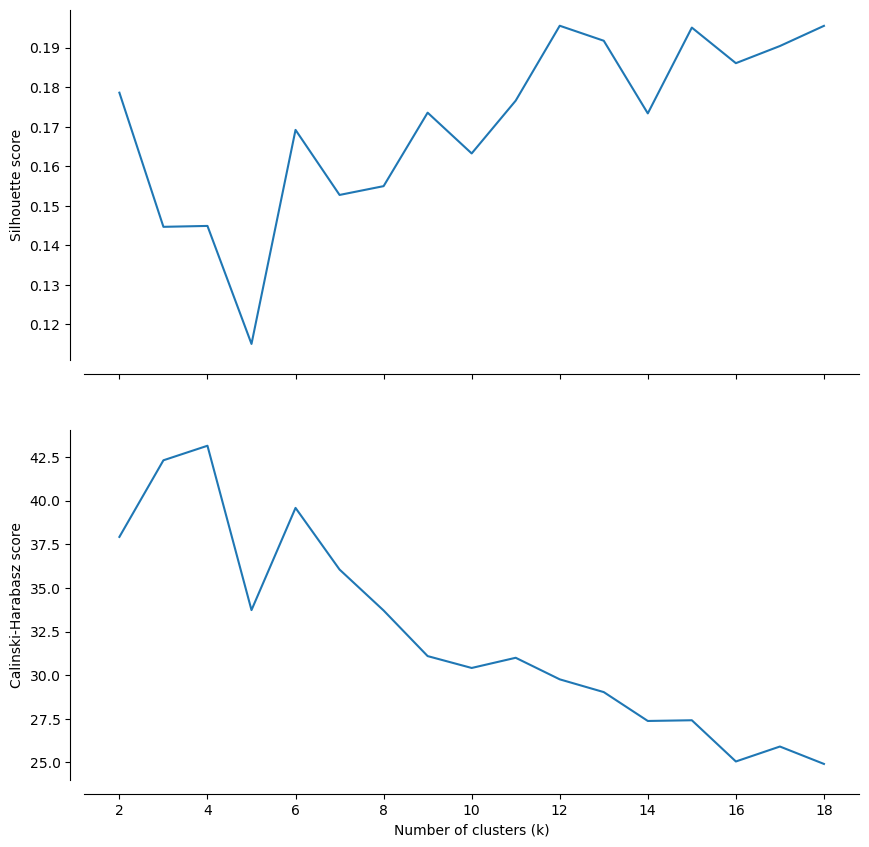

In [212]:
fig, axs = plt.subplots(2, figsize=(10, 10), sharex=True)
cgram.silhouette_score().plot(xlabel="Number of clusters (k)", ylabel="Silhouette score", ax=axs[0])
cgram.calinski_harabasz_score().plot(xlabel="Number of clusters (k)", ylabel="Calinski-Harabasz score", ax=axs[1])
sns.despine(offset=10)

In [214]:
cgram.labels_

1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18
0     0   1   2   1   0   2   3   4   4   6   3   0   8  11   1   9   2  12
1     0   0   1   2   0   4   6   0   3   5   8   5   5   5   9  12  15   6
2     0   0   1   2   0   4   6   0   3   5   8   5   5  13   0  12  15   6
3     0   1   0   1   0   2   3   4   2   6   9   0   1  11   1   8   4  14
4     0   1   0   1   0   2   3   4   2   6   3   0   1  11   1   8   4  14
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
268   0   1   0   1   4   1   1   3   0   4   4   8   2   4  11   6   1   9
269   0   1   0   1   0   2   3   1   2   6   9   0   8  11   1   3   5  14
270   0   1   0   1   4   2   2   6   2   4   3   8  11   8  11  11  12   8
271   0   0   1   2   2   0   0   5   6   8   5  10   6   6  14   4   8   5
272   0   1   1   2   4   4   6   1   5   7   2   6   4   9   7  12   5   2

[273 rows x 18 columns]

In [ ]:
import pickle

with open(f"output/{place}/clustergram.pickle", 'wb') as f:
    pickle.dump(cgram, f)

In [ ]:
# Map for comparison
f, ax = plt.subplots(figsize=(100, 100))
merged_df.plot(ax=ax, column="cluster_ID", categorical=True, legend=True, cmap='Pastel1')
ax.set_axis_off()

In [ ]:
merged_df.to_parquet(f"./out/{place}/tessellation_stats_clusters.pq")